In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '188.0 thousand',
 5: '368.4 thousand',
 10: '532.0 thousand',
 20: '832.5 thousand',
 30: '1.1 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.6 million',
 70: '3.4 million',
 80: '4.6 million',
 90: '7.2 million',
 95: '10.4 million',
 99: '20.4 million'}
-
## Actual GPT-3 estimated to be ##
{1: '183.3 thousand',
 5: '325.2 thousand',
 10: '442.5 thousand',
 20: '639.7 thousand',
 30: '837.1 thousand',
 40: '1.0 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.6 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.3 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.2th percentile of the model
-


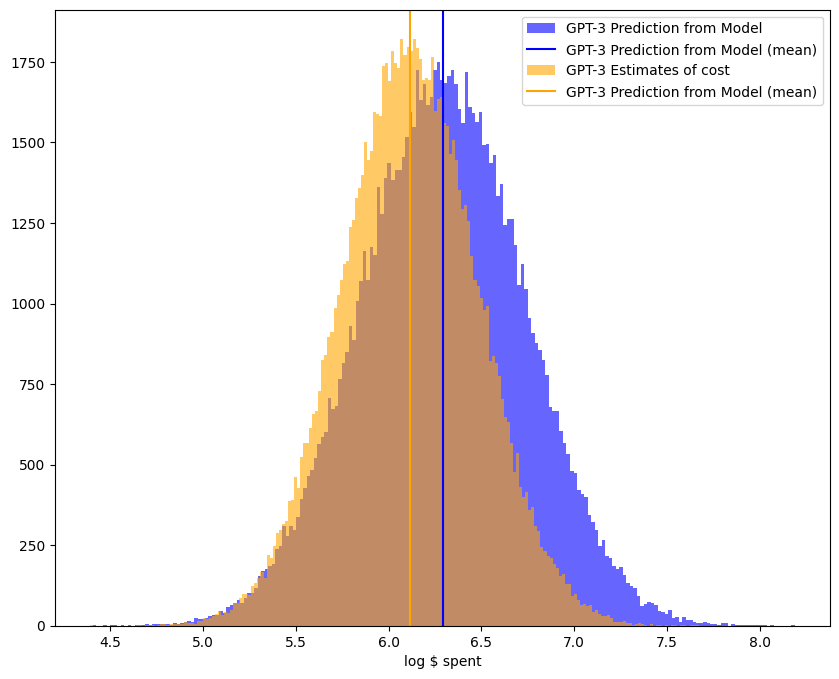

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.7 million',
 5: '5.6 million',
 10: '7.1 million',
 20: '9.3 million',
 30: '11.4 million',
 40: '13.5 million',
 50: '15.8 million',
 60: '18.5 million',
 70: '22.0 million',
 80: '26.7 million',
 90: '35.2 million',
 95: '44.0 million',
 99: '67.8 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.3 million',
 5: '5.9 million',
 10: '8.0 million',
 20: '11.5 million',
 30: '15.1 million',
 40: '18.9 million',
 50: '23.5 million',
 60: '29.1 million',
 70: '36.4 million',
 80: '47.6 million',
 90: '68.6 million',
 95: '92.5 million',
 99: '159.8 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.1th percentile of the model
-


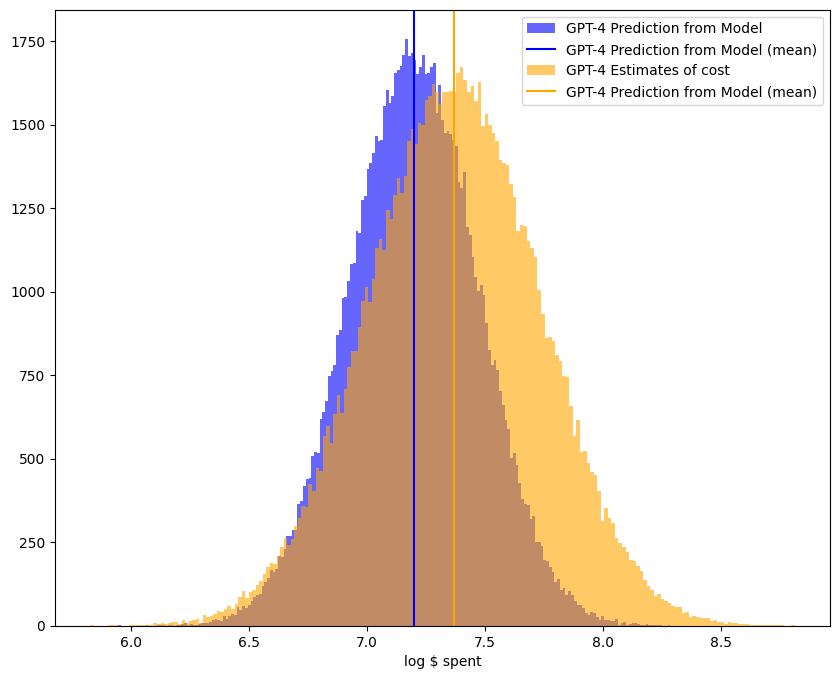

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.4 million',
 5: '7.3 million',
 10: '13.2 million',
 20: '27.4 million',
 30: '46.4 million',
 40: '72.7 million',
 50: '110.0 million',
 60: '166.8 million',
 70: '260.4 million',
 80: '434.3 million',
 90: '888.8 million',
 95: '1.6 billion',
 99: '4.5 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.6 million',
 5: '8.0 million',
 10: '10.8 million',
 20: '15.8 million',
 30: '20.6 million',
 40: '25.9 million',
 50: '32.0 million',
 60: '39.7 million',
 70: '49.9 million',
 80: '65.3 million',
 90: '94.2 million',
 95: '128.5 million',
 99: '230.8 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 22.8th percentile of the model
-


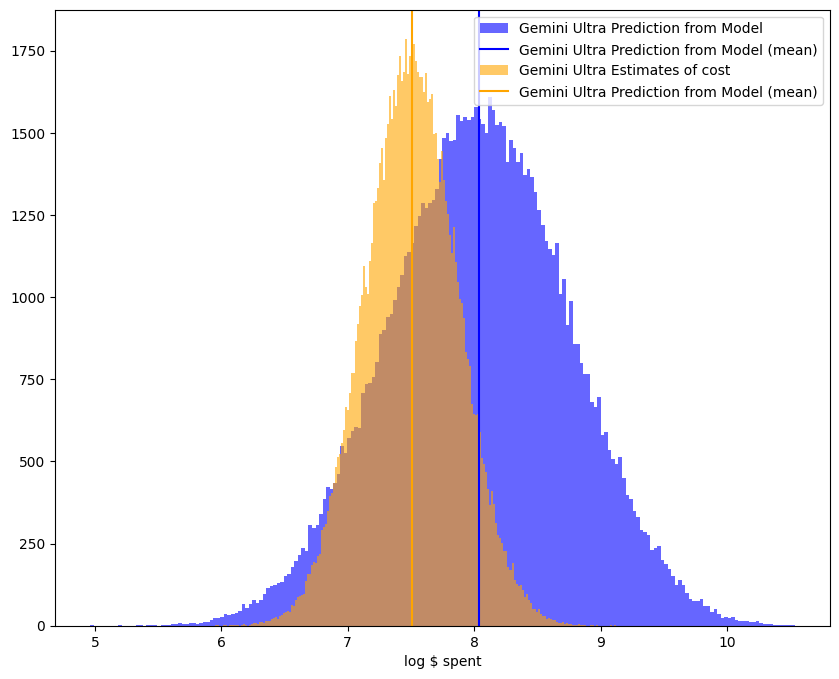

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Mistral Large Prediction (for calibration)

## Model predicts Mistral large spend will be ##
{1: '3.1 million',
 5: '5.1 million',
 10: '6.7 million',
 20: '9.2 million',
 30: '11.6 million',
 40: '14.2 million',
 50: '17.2 million',
 60: '20.7 million',
 70: '25.4 million',
 80: '32.0 million',
 90: '44.0 million',
 95: '57.4 million',
 99: '94.3 million'}
-
## Actual Mistral large estimated to be ##
{1: '2.8 million',
 5: '5.0 million',
 10: '6.8 million',
 20: '9.8 million',
 30: '12.8 million',
 40: '16.1 million',
 50: '19.9 million',
 60: '24.6 million',
 70: '30.9 million',
 80: '40.4 million',
 90: '58.7 million',
 95: '79.6 million',
 99: '139.6 million'}
-
Actual spend on Mistral large ($20.0M) is at the 58.2th percentile of the model
-


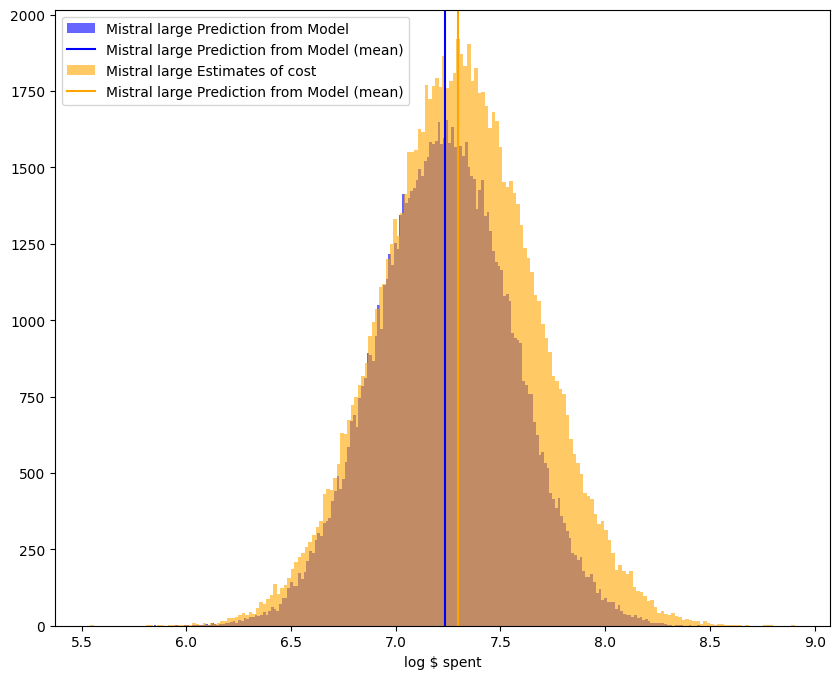

In [5]:
mistral_prediction = lab_spend_on_largest_model_this_year(total_investment=600*M,
                                                          total_revenue=0,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_revenue_that_is_profit=0,
                                                          percent_profit_spent_this_year=0,
                                                          percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                          percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
samples = mistral_prediction @ (100*K)

# 2e25 FLOP per https://epochai.org/blog/tracking-compute-intensive-ai-models
# Guess ~1e18 FLOP per $
# = 2e7 cost
actual_mistral_spend = 20*M

plot_model_versus_estimate('Mistral large', samples, actual_mistral_spend)

## Model for Largest Training Run in 2025

## SPEND ESTIMATE ##

$112.0 million (80%CI: $34.4 million to $368.2 million)

{1: '13.2 million',
 5: '24.5 million',
 10: '34.4 million',
 20: '51.5 million',
 30: '68.9 million',
 40: '88.4 million',
 50: '111.7 million',
 60: '141.2 million',
 70: '181.3 million',
 80: '244.0 million',
 90: '368.2 million',
 95: '515.8 million',
 99: '951.7 million'}



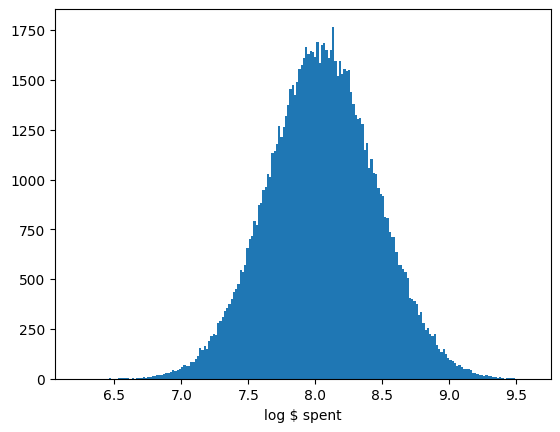



## FLOP ESTIMATE ##

26.85 log FLOP (80%CI: 26.15 to 27.54 log FLOP)

{1: 25.58,
 5: 25.96,
 10: 26.15,
 20: 26.39,
 30: 26.57,
 40: 26.71,
 50: 26.85,
 60: 26.99,
 70: 27.14,
 80: 27.31,
 90: 27.54,
 95: 27.74,
 99: 28.12}



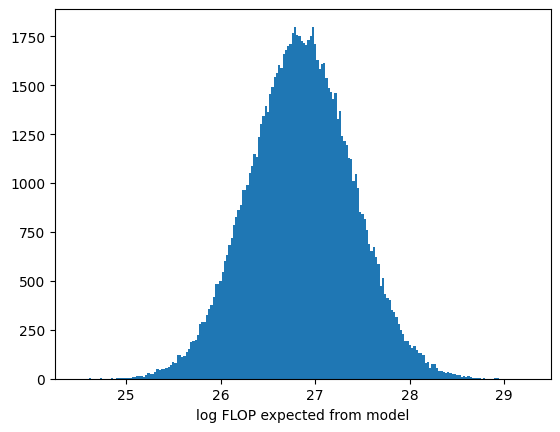

In [6]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 20*B),
                                                                       total_revenue=sq.lognorm(2*B, 4*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$64.8 million (80%CI: $21.2 million to $199.4 million)

{1: '8.6 million',
 5: '15.6 million',
 10: '21.2 million',
 20: '31.1 million',
 30: '40.9 million',
 40: '51.9 million',
 50: '64.6 million',
 60: '80.4 million',
 70: '102.1 million',
 80: '135.6 million',
 90: '199.4 million',
 95: '275.7 million',
 99: '487.9 million'}



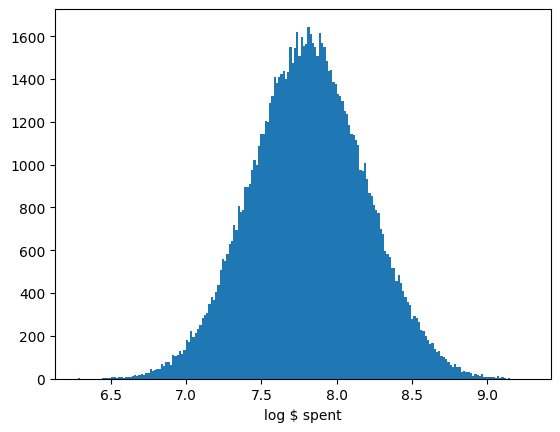



## FLOP ESTIMATE ##

26.61 log FLOP (80%CI: 25.94 to 27.29 log FLOP)

{1: 25.4,
 5: 25.75,
 10: 25.94,
 20: 26.17,
 30: 26.33,
 40: 26.48,
 50: 26.61,
 60: 26.74,
 70: 26.89,
 80: 27.05,
 90: 27.29,
 95: 27.47,
 99: 27.83}



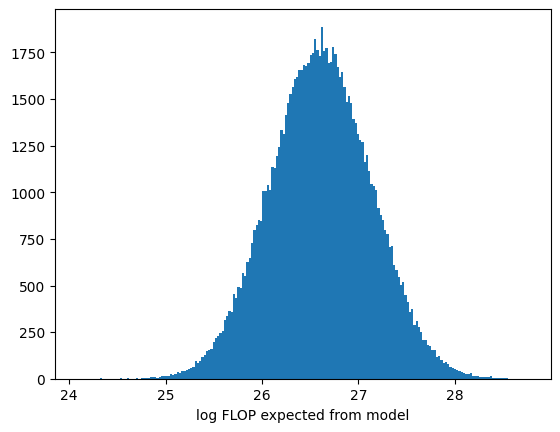

In [7]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(3*B, 8*B),
                                                                          total_revenue=sq.lognorm(1*B, 2*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.15, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$119.6 million (80%CI: $14.2 million to $990.0 million)

{1: '2.6 million',
 5: '7.9 million',
 10: '14.2 million',
 20: '29.6 million',
 30: '50.2 million',
 40: '79.1 million',
 50: '120.8 million',
 60: '183.1 million',
 70: '287.2 million',
 80: '484.3 million',
 90: '990.0 million',
 95: '1.8 billion',
 99: '5.2 billion'}



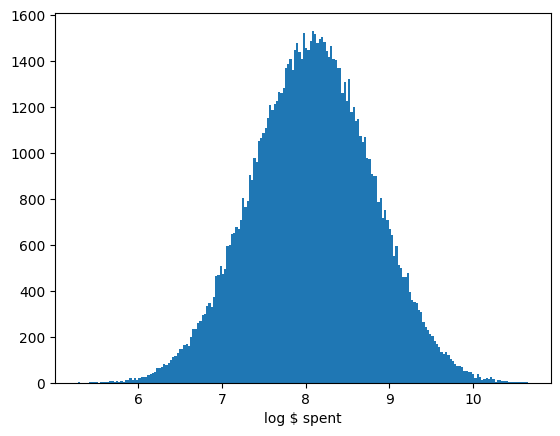



## FLOP ESTIMATE ##

26.88 log FLOP (80%CI: 25.84 to 27.91 log FLOP)

{1: 25.01,
 5: 25.55,
 10: 25.84,
 20: 26.2,
 30: 26.46,
 40: 26.67,
 50: 26.88,
 60: 27.08,
 70: 27.3,
 80: 27.55,
 90: 27.91,
 95: 28.2,
 99: 28.73}



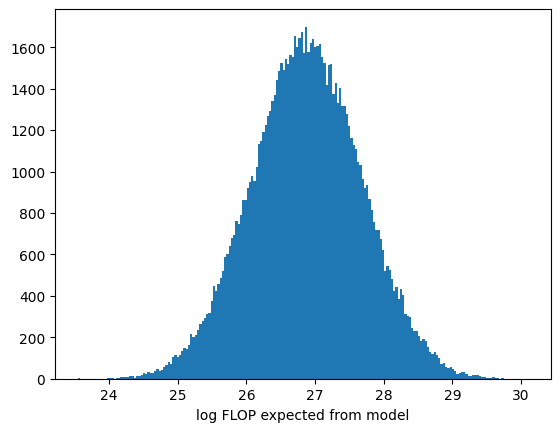

In [8]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 60*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
show_model_forecast(largest_google_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$23.6 million (80%CI: $2.4 million to $262.0 million)

{1: '731.7 thousand',
 5: '1.5 million',
 10: '2.4 million',
 20: '4.6 million',
 30: '8.0 million',
 40: '13.4 million',
 50: '21.9 million',
 60: '36.0 million',
 70: '60.4 million',
 80: '111.8 million',
 90: '262.0 million',
 95: '528.4 million',
 99: '1.9 billion'}



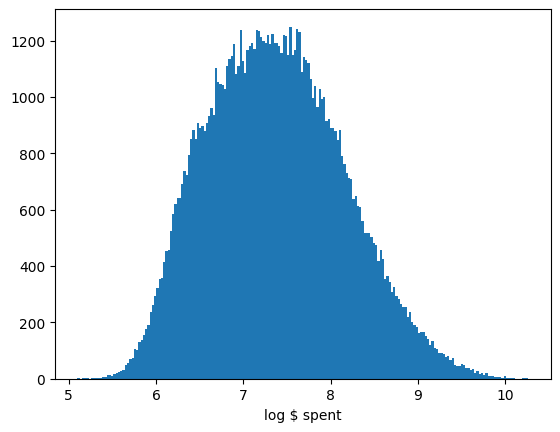



## FLOP ESTIMATE ##

26.17 log FLOP (80%CI: 25.08 to 27.31 log FLOP)

{1: 24.4,
 5: 24.82,
 10: 25.08,
 20: 25.42,
 30: 25.68,
 40: 25.92,
 50: 26.14,
 60: 26.37,
 70: 26.62,
 80: 26.92,
 90: 27.31,
 95: 27.64,
 99: 28.25}



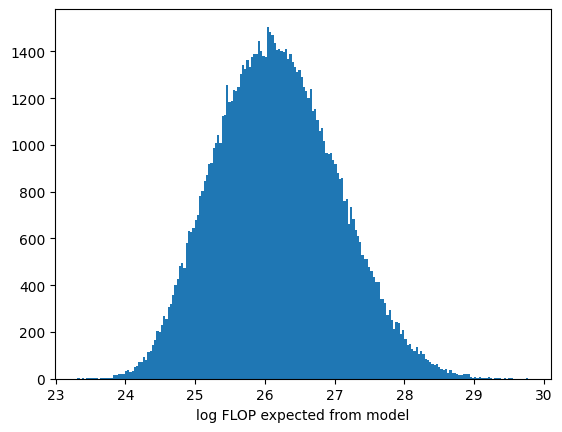

In [9]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 70*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
show_model_forecast(largest_microsoft_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$41.3 million (80%CI: $2.9 million to $583.5 million)

{1: '343.1 thousand',
 5: '1.4 million',
 10: '2.9 million',
 20: '7.2 million',
 30: '14.0 million',
 40: '24.7 million',
 50: '42.0 million',
 60: '70.3 million',
 70: '124.0 million',
 80: '238.5 million',
 90: '583.5 million',
 95: '1.2 billion',
 99: '4.3 billion'}



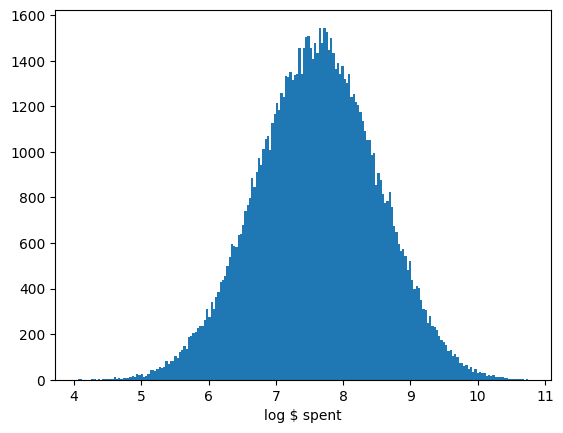



## FLOP ESTIMATE ##

26.41 log FLOP (80%CI: 25.17 to 27.66 log FLOP)

{1: 24.16,
 5: 24.81,
 10: 25.17,
 20: 25.59,
 30: 25.9,
 40: 26.17,
 50: 26.42,
 60: 26.67,
 70: 26.93,
 80: 27.24,
 90: 27.66,
 95: 28.0,
 99: 28.61}



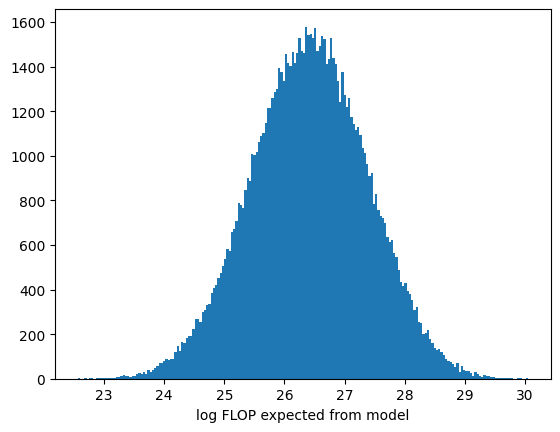

In [10]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 70*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.4),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.2))
show_model_forecast(largest_fb_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$28.6 million (80%CI: $8.8 million to $92.8 million)

{1: '3.4 million',
 5: '6.3 million',
 10: '8.8 million',
 20: '13.2 million',
 30: '17.7 million',
 40: '22.7 million',
 50: '28.7 million',
 60: '36.1 million',
 70: '46.2 million',
 80: '61.7 million',
 90: '92.8 million',
 95: '129.4 million',
 99: '237.4 million'}



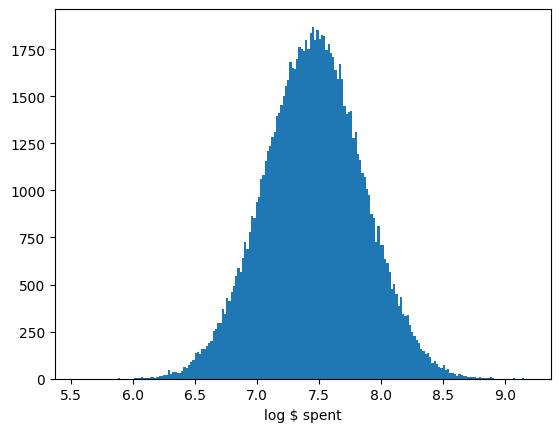



## FLOP ESTIMATE ##

26.26 log FLOP (80%CI: 25.56 to 26.95 log FLOP)

{1: 24.99,
 5: 25.36,
 10: 25.56,
 20: 25.8,
 30: 25.97,
 40: 26.12,
 50: 26.26,
 60: 26.39,
 70: 26.54,
 80: 26.71,
 90: 26.95,
 95: 27.14,
 99: 27.51}



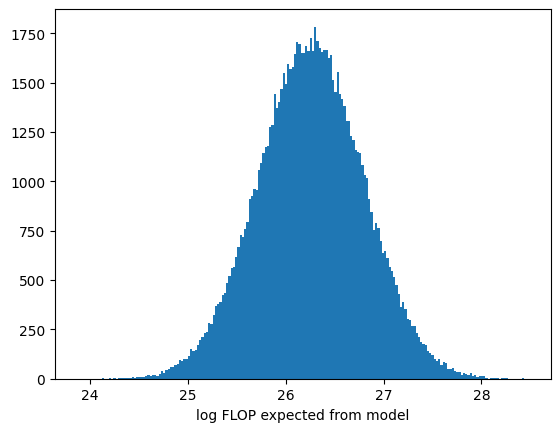

In [11]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(500*M, 2*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_mistral_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$56.8 million (80%CI: $17.4 million to $183.4 million)

{1: '6.7 million',
 5: '12.5 million',
 10: '17.4 million',
 20: '26.2 million',
 30: '35.2 million',
 40: '45.1 million',
 50: '57.0 million',
 60: '72.0 million',
 70: '92.1 million',
 80: '122.8 million',
 90: '183.4 million',
 95: '254.1 million',
 99: '471.5 million'}



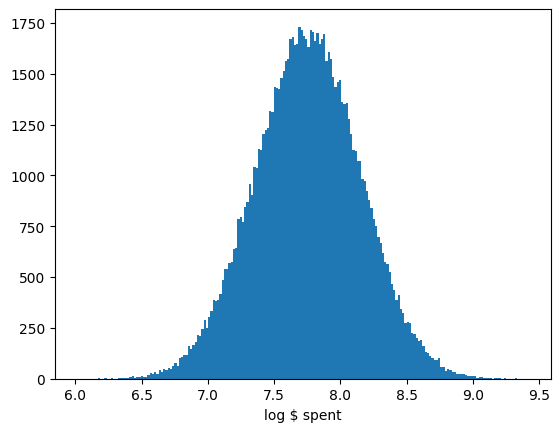



## FLOP ESTIMATE ##

26.55 log FLOP (80%CI: 25.86 to 27.25 log FLOP)

{1: 25.3,
 5: 25.66,
 10: 25.86,
 20: 26.1,
 30: 26.27,
 40: 26.42,
 50: 26.56,
 60: 26.69,
 70: 26.84,
 80: 27.01,
 90: 27.25,
 95: 27.44,
 99: 27.8}



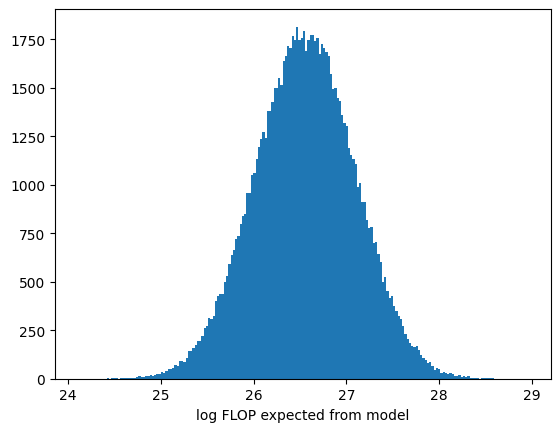

In [12]:
largest_xai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 4*B, credibility=80),
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_xai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$6.2 million (80%CI: $1.3 million to $30.5 million)

{1: '349.4 thousand',
 5: '811.5 thousand',
 10: '1.3 million',
 20: '2.2 million',
 30: '3.2 million',
 40: '4.5 million',
 50: '6.2 million',
 60: '8.5 million',
 70: '11.9 million',
 80: '17.7 million',
 90: '30.5 million',
 95: '48.0 million',
 99: '113.1 million'}



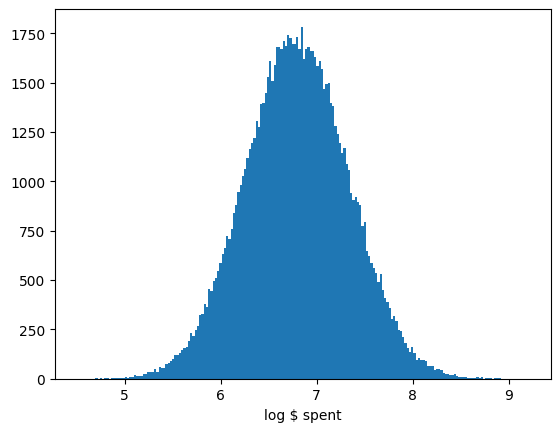



## FLOP ESTIMATE ##

25.59 log FLOP (80%CI: 24.76 to 26.43 log FLOP)

{1: 24.09,
 5: 24.52,
 10: 24.76,
 20: 25.05,
 30: 25.25,
 40: 25.43,
 50: 25.59,
 60: 25.76,
 70: 25.93,
 80: 26.14,
 90: 26.43,
 95: 26.67,
 99: 27.12}



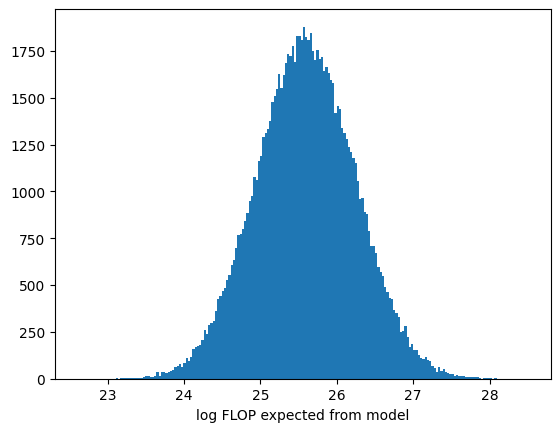

In [13]:
largest_us_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 1*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                     percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
show_model_forecast(largest_us_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$1.1 million (80%CI: $330.4 thousand to $3.7 million)

{1: '171.0 thousand',
 5: '257.4 thousand',
 10: '330.4 thousand',
 20: '464.9 thousand',
 30: '616.7 thousand',
 40: '799.5 thousand',
 50: '1.0 million',
 60: '1.3 million',
 70: '1.7 million',
 80: '2.4 million',
 90: '3.7 million',
 95: '5.3 million',
 99: '10.1 million'}



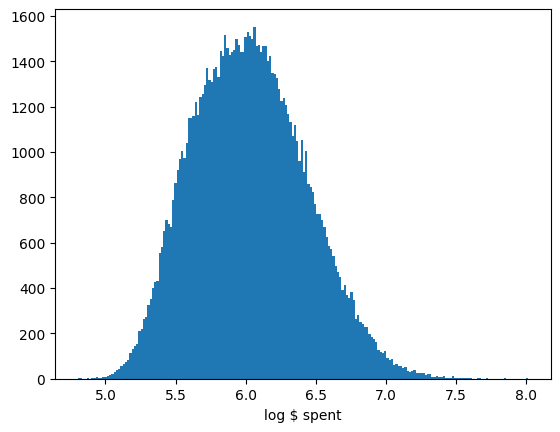



## FLOP ESTIMATE ##

24.83 log FLOP (80%CI: 24.14 to 25.54 log FLOP)

{1: 23.62,
 5: 23.95,
 10: 24.14,
 20: 24.37,
 30: 24.53,
 40: 24.68,
 50: 24.82,
 60: 24.96,
 70: 25.11,
 80: 25.29,
 90: 25.54,
 95: 25.74,
 99: 26.13}



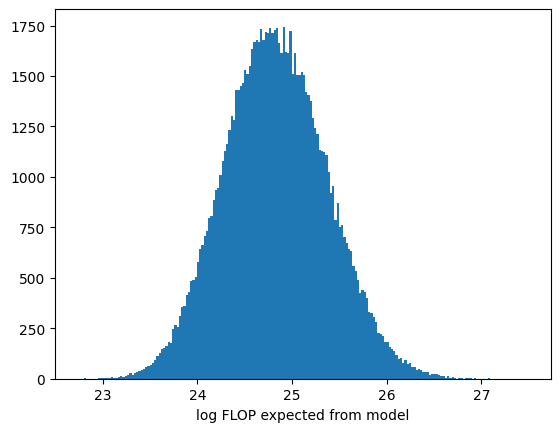

In [14]:
largest_uk_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(500*M, 1*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.01))
show_model_forecast(largest_uk_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$1.9 million (80%CI: $133.7 thousand to $27.8 million)

{1: '15.3 thousand',
 5: '63.3 thousand',
 10: '133.7 thousand',
 20: '335.5 thousand',
 30: '643.7 thousand',
 40: '1.1 million',
 50: '1.9 million',
 60: '3.3 million',
 70: '5.8 million',
 80: '11.2 million',
 90: '27.8 million',
 95: '59.3 million',
 99: '242.3 million'}



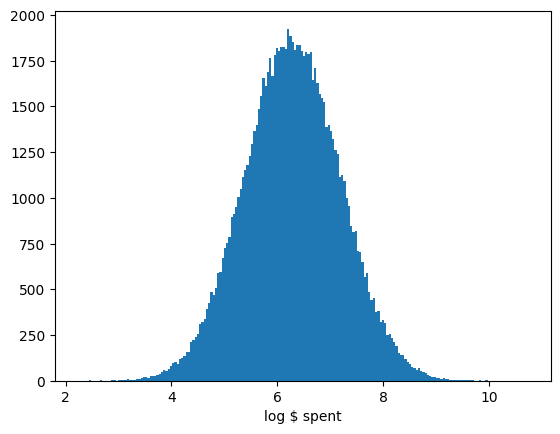



## FLOP ESTIMATE ##

25.09 log FLOP (80%CI: 23.84 to 26.34 log FLOP)

{1: 22.83,
 5: 23.49,
 10: 23.84,
 20: 24.27,
 30: 24.57,
 40: 24.84,
 50: 25.08,
 60: 25.33,
 70: 25.6,
 80: 25.9,
 90: 26.34,
 95: 26.69,
 99: 27.35}



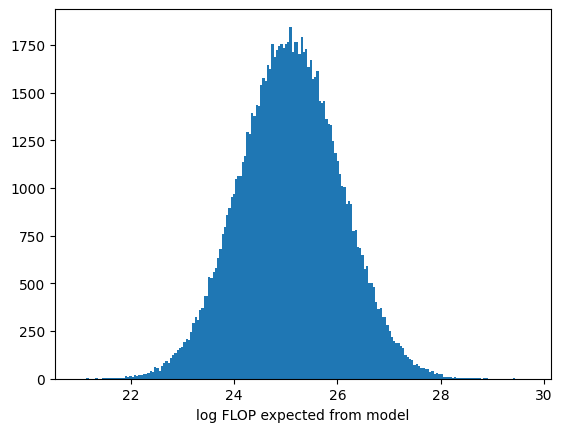

In [15]:
largest_china_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 10*B, credibility=80),
                                                                        percent_r_and_d_on_ai=1,
                                                                        percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                        percent_compute_on_biggest_model=pct_dist(0.01, 0.1))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_china_gov_prediction = sq.dist_max(0, largest_china_gov_prediction - sq.norm(0.5, 1.5, lclip=0.05, rclip=1))

show_model_forecast(largest_china_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$21.7 million (80%CI: $3.0 million to $297.8 million)

{1: '1.3 million',
 5: '2.2 million',
 10: '3.0 million',
 20: '4.7 million',
 30: '6.7 million',
 40: '9.6 million',
 50: '14.2 million',
 60: '23.3 million',
 70: '44.8 million',
 80: '99.3 million',
 90: '297.8 million',
 95: '737.6 million',
 99: '3.6 billion'}



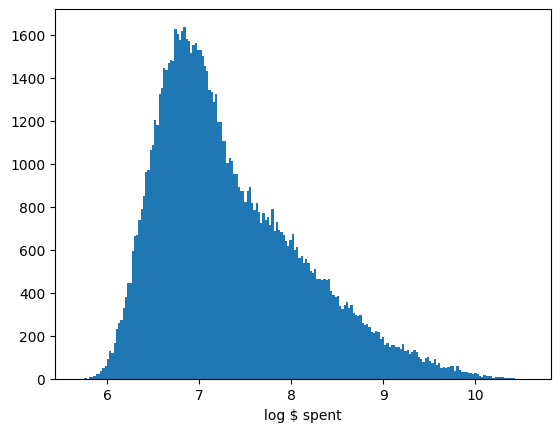



## FLOP ESTIMATE ##

26.14 log FLOP (80%CI: 25.13 to 27.36 log FLOP)

{1: 24.56,
 5: 24.93,
 10: 25.13,
 20: 25.4,
 30: 25.61,
 40: 25.8,
 50: 26.0,
 60: 26.23,
 70: 26.51,
 80: 26.86,
 90: 27.36,
 95: 27.77,
 99: 28.51}



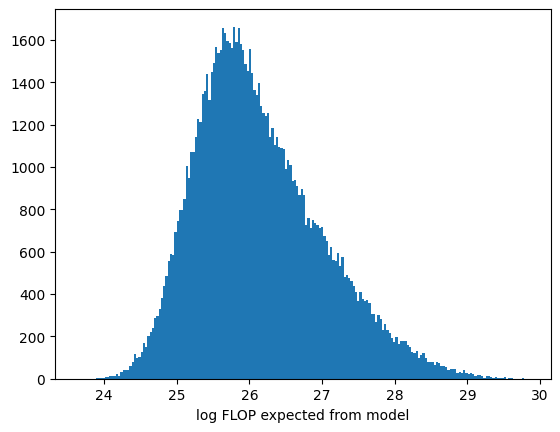

In [16]:
largest_arab_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(30*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=1,
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.0001, 0.05))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_arab_gov_prediction = sq.dist_max(0, largest_arab_gov_prediction - sq.norm(0.05, 1, lclip=0.05, rclip=1))

show_model_forecast(largest_arab_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$468.7 million (80%CI: $139.9 million to $2.0 billion)

{1: '71.2 million',
 5: '109.5 million',
 10: '139.9 million',
 20: '193.6 million',
 30: '251.4 million',
 40: '318.5 million',
 50: '406.6 million',
 60: '528.9 million',
 70: '719.5 million',
 80: '1.1 billion',
 90: '2.0 billion',
 95: '3.3 billion',
 99: '8.4 billion'}



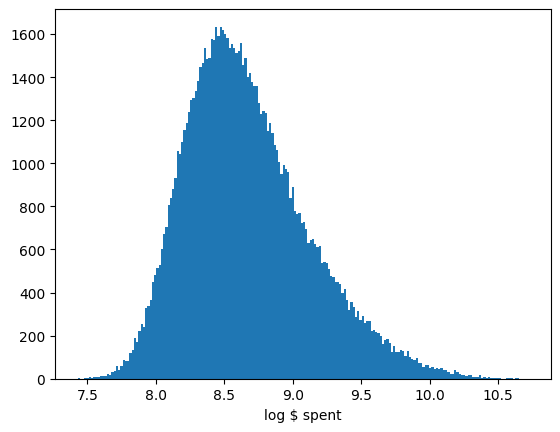



## FLOP ESTIMATE ##

27.47 log FLOP (80%CI: 26.75 to 28.23 log FLOP)

{1: 26.25,
 5: 26.57,
 10: 26.75,
 20: 26.98,
 30: 27.15,
 40: 27.3,
 50: 27.44,
 60: 27.59,
 70: 27.75,
 80: 27.94,
 90: 28.23,
 95: 28.49,
 99: 28.96}



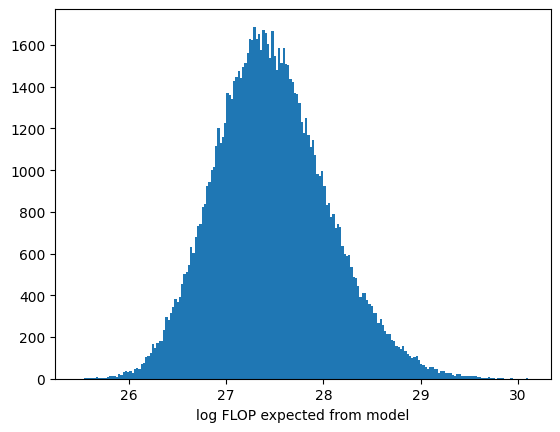

In [17]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_xai_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(largest_us_gov_prediction) >>
               sq.dist_max(largest_uk_gov_prediction) >>
               sq.dist_max(largest_arab_gov_prediction) >>
               sq.dist_max(largest_china_gov_prediction))

show_model_forecast(mixed_model @ (100*K))

In [18]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['xAI', largest_xai_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['US', largest_us_gov_prediction],
          ['UK', largest_uk_gov_prediction],
          ['Arab', largest_arab_gov_prediction],
          ['China', largest_china_gov_prediction]]

print('## % of having largest model ##')
labels = [m[0] for m in models]
model_sizes_log = np.array([m[1] @ 100_000 for m in models])
max_indices = np.argmax(model_sizes_log, axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
pprint(label_percentages)
print('')
print('')

print('## % of being frontier (within 1OOM of largest model) ##')
max_log_sizes = np.max(model_sizes_log, axis=0)
within_one_OOM = (model_sizes_log >= (max_log_sizes - 1))
within_one_OOM_counts = np.sum(within_one_OOM, axis=1)
total_samples = model_sizes_log.shape[1]  # Total number of samples
label_percentages_within_one_OOM = {label: f"{round((count / total_samples) * 100, 1)}%" for label, count in zip(labels, within_one_OOM_counts)}
pprint(label_percentages_within_one_OOM)

## % of having largest model ##
{'Anthropic': '7.0%',
 'Arab': '9.4%',
 'China': '0.8%',
 'Google': '30.4%',
 'Meta': '16.7%',
 'Microsoft': '8.7%',
 'Mistral': '1.5%',
 'OpenAI': '19.3%',
 'US': '0.2%',
 'xAI': '6.0%'}


## % of being frontier (within 1OOM of largest model) ##
{'Anthropic': '62.0%',
 'Arab': '33.4%',
 'China': '8.2%',
 'Google': '75.1%',
 'Meta': '51.7%',
 'Microsoft': '38.3%',
 'Mistral': '37.9%',
 'OpenAI': '76.1%',
 'UK': '0.2%',
 'US': '10.3%',
 'xAI': '58.5%'}


## Cache spend model

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 7.9,
 5: 8.0,
 10: 8.1,
 20: 8.3,
 30: 8.4,
 40: 8.5,
 50: 8.6,
 60: 8.7,
 70: 8.9,
 80: 9.0,
 90: 9.3,
 95: 9.5,
 99: 9.9}


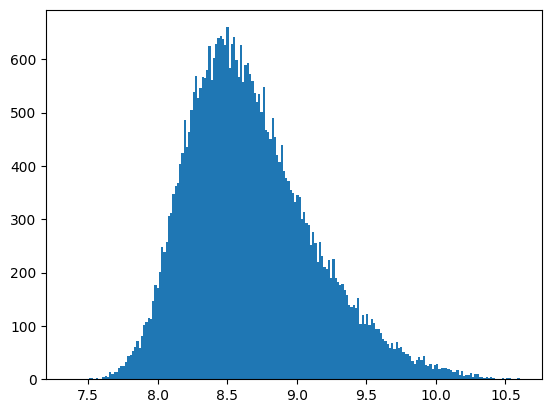

In [19]:
# Output expected willingness to pay for a model in 2025, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## Appendix

## SPEND ESTIMATE ##

$5.0 billion (80%CI: $2.6 billion to $9.7 billion)

{1: '1.5 billion',
 5: '2.1 billion',
 10: '2.6 billion',
 20: '3.2 billion',
 30: '3.8 billion',
 40: '4.4 billion',
 50: '5.0 billion',
 60: '5.7 billion',
 70: '6.5 billion',
 80: '7.7 billion',
 90: '9.7 billion',
 95: '11.7 billion',
 99: '16.7 billion'}



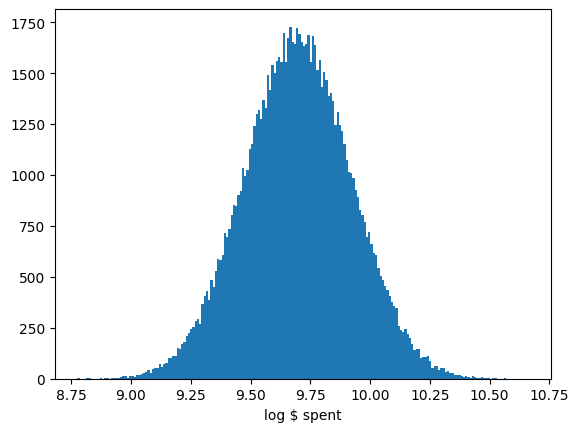



## FLOP ESTIMATE ##

28.5 log FLOP (80%CI: 27.95 to 29.04 log FLOP)

{1: 27.49,
 5: 27.79,
 10: 27.95,
 20: 28.14,
 30: 28.27,
 40: 28.39,
 50: 28.5,
 60: 28.6,
 70: 28.72,
 80: 28.86,
 90: 29.04,
 95: 29.2,
 99: 29.5}



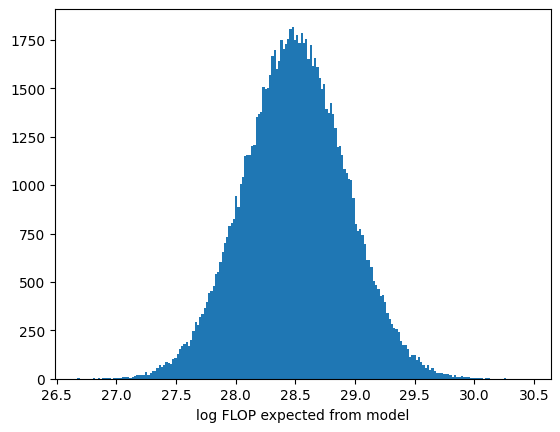

In [20]:
stargate = lab_spend_on_largest_model_this_year(total_investment=100*B,
                                                total_revenue=0,
                                                percent_investment_spent_this_year=1,
                                                percent_revenue_that_is_profit=0,
                                                percent_profit_spent_this_year=0,
                                                percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(stargate @ (100*K))

In [21]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-04-11 13:38:48.663922
